This notebook builds a Random Forest Regressive model to predict the incidence of malaria based on chosen socioeconomic indicators. It handles missing data via interpolation which appears to be more reliable than using mean for this dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import (
                                    train_test_split, 
                                    cross_val_score,
                                    learning_curve
)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
                            mean_squared_error, 
                            r2_score
)

In [2]:
df = pd.read_csv('final_socioeco_demographics.csv')

In [3]:
df.head()

,Unnamed: 0,"Access to anti-retroviral drugs, female (%)","Access to anti-retroviral drugs, male (%)","Agriculture, forestry, and fishing, value added (% of GDP)",Current health expenditure (% of GDP),Domestic general government health expenditure (% of GDP),Domestic general government health expenditure (% of current health expenditure),Domestic private health expenditure (% of current health expenditure),"Immunization, DPT (% of children ages 12-23 months)","Immunization, HepB3 (% of one-year-old children)",...,People with basic handwashing facilities including soap and water (% of population),Political Stability and Absence of Violence/Terrorism: Estimate,Political Stability and Absence of Violence/Terrorism: Percentile Rank,Rural population,Rural population (% of total population),Tuberculosis treatment success rate (% of new cases),Urban population,Urban population (% of total population),Year,total_deaths_from_violence
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1950.0,NaN
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1951.0,NaN
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1952.0,NaN
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1953.0,NaN
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1954.0,NaN


Performing interpolation

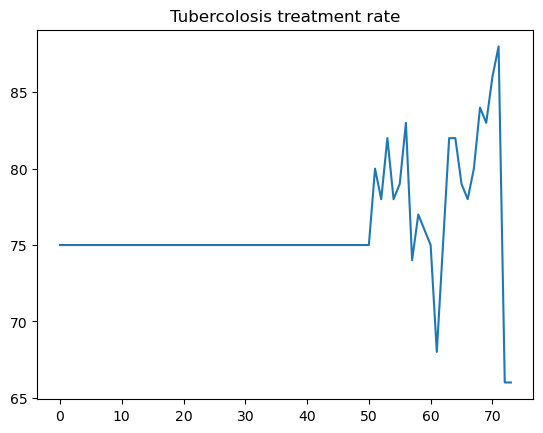

In [4]:
df.replace(0, np.nan, inplace=True)
df_interpolated = df.interpolate(method="linear", limit_direction='both')
df_interpolated["Tuberculosis treatment success rate (% of new cases)"].plot(label="Původní")

plt.title('Tubercolosis treatment rate')
plt.show()

In [5]:
df_interpolated.head()

,Unnamed: 0,"Access to anti-retroviral drugs, female (%)","Access to anti-retroviral drugs, male (%)","Agriculture, forestry, and fishing, value added (% of GDP)",Current health expenditure (% of GDP),Domestic general government health expenditure (% of GDP),Domestic general government health expenditure (% of current health expenditure),Domestic private health expenditure (% of current health expenditure),"Immunization, DPT (% of children ages 12-23 months)","Immunization, HepB3 (% of one-year-old children)",...,People with basic handwashing facilities including soap and water (% of population),Political Stability and Absence of Violence/Terrorism: Estimate,Political Stability and Absence of Violence/Terrorism: Percentile Rank,Rural population,Rural population (% of total population),Tuberculosis treatment success rate (% of new cases),Urban population,Urban population (% of total population),Year,total_deaths_from_violence
0,1.0,4.0,5.0,51.0,3.0,1.0,33.0,66.0,1.0,22.0,...,26.0,-2.0,1.0,7465641.0,89.0,75.0,898848.0,10.0,1950.0,5512.0
1,1.0,4.0,5.0,51.0,3.0,1.0,33.0,66.0,1.0,22.0,...,26.0,-2.0,1.0,7465641.0,89.0,75.0,898848.0,10.0,1951.0,5512.0
2,2.0,4.0,5.0,51.0,3.0,1.0,33.0,66.0,1.0,22.0,...,26.0,-2.0,1.0,7465641.0,89.0,75.0,898848.0,10.0,1952.0,5512.0
3,3.0,4.0,5.0,51.0,3.0,1.0,33.0,66.0,1.0,22.0,...,26.0,-2.0,1.0,7465641.0,89.0,75.0,898848.0,10.0,1953.0,5512.0
4,4.0,4.0,5.0,51.0,3.0,1.0,33.0,66.0,1.0,22.0,...,26.0,-2.0,1.0,7465641.0,89.0,75.0,898848.0,10.0,1954.0,5512.0


Creating training and testing dataset.

In [6]:
x = df_interpolated.copy().drop('Incidence of malaria (per 1,000 population at risk)', axis=1)
y = df_interpolated["Incidence of malaria (per 1,000 population at risk)"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Training the model with selected 10 most important features.

In [7]:
rf_model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=7)
rf_model.fit(X_train, y_train)

feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
top_features = feature_importances.nlargest(10).index

X = df_interpolated[top_features]
y = df_interpolated["Incidence of malaria (per 1,000 population at risk)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

Evaluating the model performance.

In [8]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error (Random Forest): {mse_rf}')

r2_rf = r2_score(y_test, y_pred_rf)
print(f'R-squared (Random Forest): {r2_rf}')

residuals_rf = y_test - y_pred_rf
print(f"Variance: {df["Incidence of malaria (per 1,000 population at risk)"].var()}")
standard_error_rf = np.sqrt(np.mean(residuals_rf ** 2))
print(f"Standard Error of the Residuals (Random Forest RMSE): {standard_error_rf}")

Mean Squared Error (Random Forest): 0.390943333333334
R-squared (Random Forest): 0.9990043437167501
Variance: 305.3162055335969
Standard Error of the Residuals (Random Forest RMSE): 0.6252546148037086


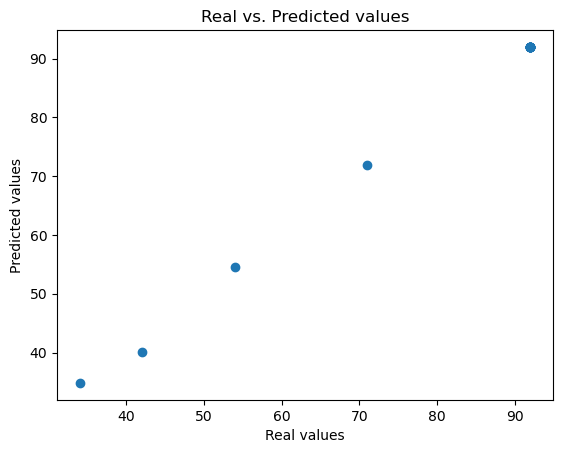

In [9]:
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.title('Real vs. Predicted values')
plt.show()

Controlling overfitting.

In [10]:
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')

print(f'Cross-Validation R² Scores: {cv_scores}')
print(f'Average CV R² Score: {cv_scores.mean():.4f}')

Cross-Validation R² Scores: [0.97086793 0.97184864 0.98493854 0.9828143  0.91795829]
Average CV R² Score: 0.9657


Comparing the performance of the model by using both training and testing dataset.

In [11]:
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print(f"R² (Training): {r2_train}")
print(f"R² (Testing): {r2_test}")
print(f"Mean Squared Error (Training): {mse_train}")
print(f"Mean Squared Error (Testing): {mse_test}")
print(f"RMSE (Training): {rmse_train}")
print(f"RMSE (Testing): {rmse_test}")

R² (Training): 0.9953001580652824
R² (Testing): 0.9990043437167501
Mean Squared Error (Training): 1.8870682203389844
Mean Squared Error (Testing): 0.390943333333334
RMSE (Training): 1.3737060167077177
RMSE (Testing): 0.6252546148037086


Visualization of the model stability.

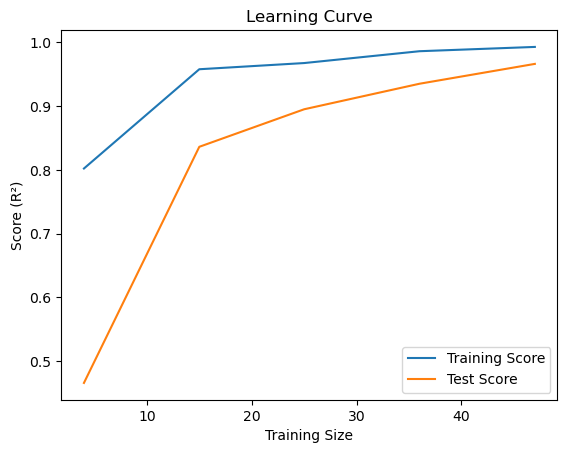

In [12]:
train_sizes, train_scores, test_scores = learning_curve(rf_model, X_train, y_train, cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Test Score")
plt.xlabel("Training Size")
plt.ylabel("Score (R²)")
plt.legend()
plt.title("Learning Curve")
plt.show()